In [1]:
#!pip install prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
#from xgboost import XGBRegressor
#from prophet import Prophet

# Tool to searilize both the fitted StandardScaler and the best estimator from the grid search
import joblib





# import files

In [3]:
### import and read csv file

path = 'Output/full_indicators_by_country_by_year.csv'
df = pd.read_csv(path)


df

,index,country,iso3Code,year,clean fuels for cooking (% of population),Access to electricity (% of population),Agricultural land (% ),Armed forces (% labor force),precipitation (mm per year),"Birth rate, crude (per 1,000 people)",...,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Total debt service (% of GNI),"Total debt service (% of exports of goods, services and primary income)",Unemployment advanced education,Unemployment basic education,Unemployment intermediate education,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Corruption index 2023,Global_Peace_Index_2023,immigration_100k
0,0,Afghanistan,AFG,2015,27.6,71.5,58.123668,3.724667,327.0,38.803,...,0.009,0.292137,3.299608,0.000,0.000,0.000,9.052,20.0,3.294,7.758981
1,1,Afghanistan,AFG,2016,28.8,97.7,58.123668,3.635915,327.0,37.936,...,0.013,0.324903,4.333403,0.000,0.000,0.000,10.133,20.0,3.294,7.651162
2,2,Afghanistan,AFG,2017,30.3,97.7,58.123668,3.501771,327.0,37.342,...,0.017,0.333475,4.353572,15.460,12.283,16.155,11.184,20.0,3.294,9.694882
3,3,Afghanistan,AFG,2018,31.4,93.4,58.276988,2.961201,327.0,36.927,...,0.016,0.344999,3.323800,15.460,12.283,16.155,11.196,20.0,3.294,9.688910
4,4,Afghanistan,AFG,2019,32.6,97.7,58.276988,3.023536,327.0,36.466,...,0.016,0.291267,2.974238,15.460,12.283,16.155,11.185,20.0,3.294,10.275749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,1658,Zimbabwe,ZWE,2019,30.3,46.7,39.518358,0.883387,657.0,31.518,...,3.630,6.322804,30.237235,5.615,6.506,9.125,7.373,24.0,2.396,3.666993
1659,1659,Zimbabwe,ZWE,2020,30.5,52.7,39.754073,0.877221,657.0,31.009,...,2.670,3.739823,18.681678,5.615,6.506,9.125,8.621,24.0,2.396,2.157548
1660,1660,Zimbabwe,ZWE,2021,30.5,49.0,39.385906,0.877221,657.0,30.537,...,2.670,2.281635,9.229217,7.116,8.089,11.589,9.540,24.0,2.396,3.196767
1661,1661,Zimbabwe,ZWE,2022,30.8,50.1,39.489284,0.877221,657.0,30.086,...,2.670,1.418276,6.088641,5.945,8.952,12.427,10.087,24.0,2.396,3.827232


## Inspect the data

In [4]:
#df.info()

In [5]:
#df.describe()

In [6]:
#df.columns

### correlation matrix to assess relationships

In [7]:
# drop columns to keep on features and target
#df_Xy = df.drop(columns=['index', 'country','iso3Code'])

In [8]:
# Plot correlation matrix to assess relationships
# plt.figure(figsize=(12,10))
# corr_matrix = df_Xy.corr()
# sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
# plt.title("Correlation Matrix")
# plt.show()

In [9]:
# Define the target and predictors.
# We remove columns that are identifiers or not used for prediction.
non_predictors = ['index', 'country', 'iso3Code']
target = 'immigration_100k'
predictors = [col for col in df.columns if col not in non_predictors + [target]]

# Select features and target
X = df[predictors]
y = df[target]

## Splitting the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(1330, 49)

In [12]:
X_test.shape

(333, 49)

## Regression Modelling

### --- Linear Regression ---

In [13]:
# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 575.0567664962434
Linear Regression R2: 0.4419988746158543


### --- Random Forest Regression ---

In [14]:
# --- Random Forest Regression ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)
print("Random Forest Regression R2:", r2_rf)

Random Forest Regression MSE: 134.9869736634401
Random Forest Regression R2: 0.8690166126114236


The results show that the Random Forest model significantly outperforms the Linear Regression model:

- Mean Squared Error (MSE):

  - Linear Regression: 575.06
  - Random Forest: 134.99
   A lower MSE indicates that the Random Forest model's predictions are, on average, much closer to the actual values.

- R² Score:

  - Linear Regression: 0.442 (approximately 44% of the variance explained)
  - Random Forest: 0.869 (approximately 87% of the variance explained)
   The higher R² score of the Random Forest model means it captures a significantly larger proportion of the variability in immigration_100k.
   
In summary, the Random Forest model is more accurate and reliable for predicting immigration per 100k, likely due to its ability to capture non-linear relationships and interactions among the predictors that a simple linear model might miss.

## Feature Importance & Key Variable Analysis

In [15]:
# Use Random Forest to gauge feature importance
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 Unemployment, total (% of total labor force) (modeled ILO estimate)                                     0.389351
Armed forces (% labor force)                                                                            0.128361
government  consumption exp (% of GDP)                                                                  0.076217
Population, total                                                                                       0.070851
Population density                                                                                      0.039362
Total debt service (% of GNI)                                                                           0.020839
Fertility rate, total (births per woman)                                                                0.019454
Level of water stress                                                                                   0.018755
Debt service (PPG and IMF only, % of exports of goods, services and primar

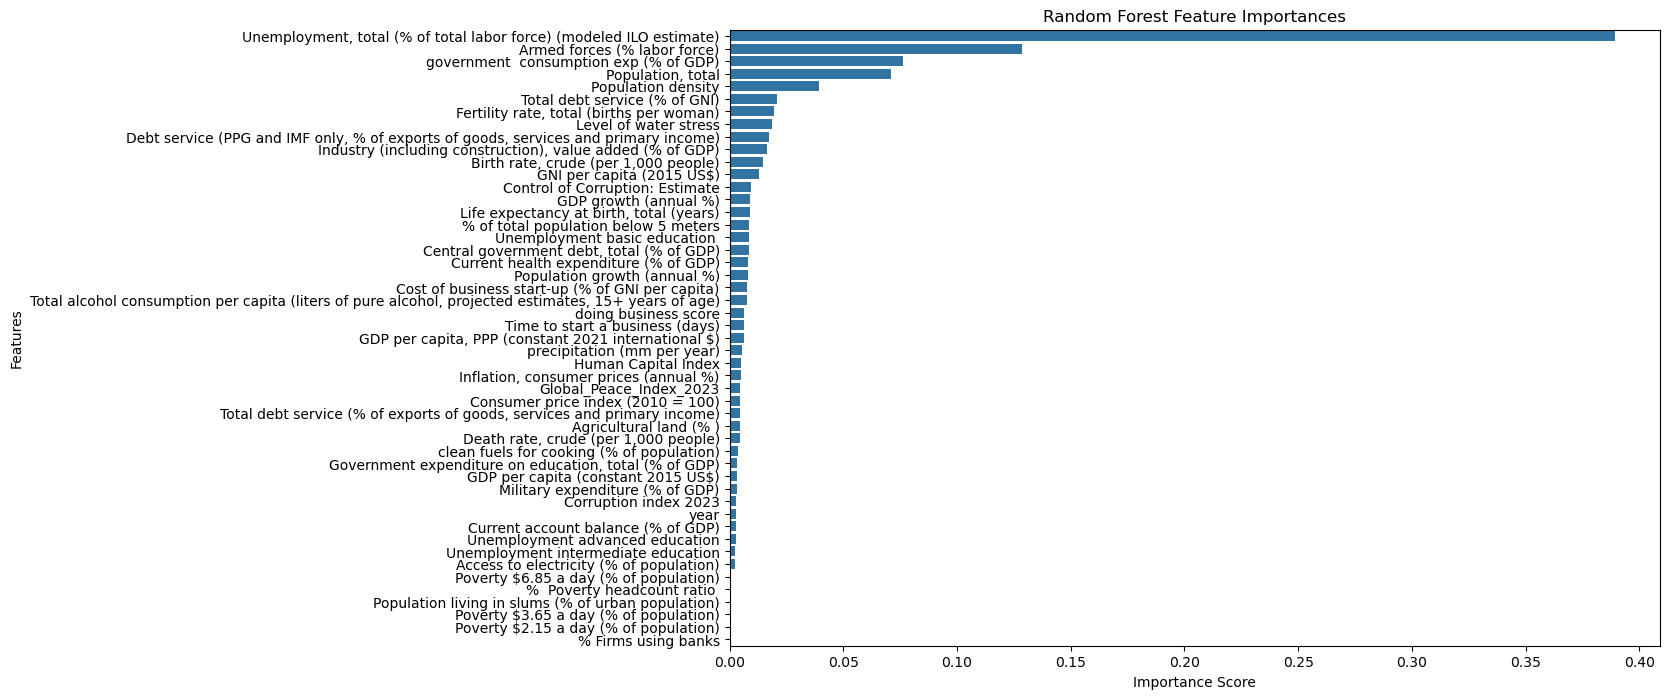

In [16]:
# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Using Feature selection

In [17]:
## Using Feature selection
top_features = feature_importances.index[:5]
X_new5 = X[top_features]
X_new5.head()

,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Armed forces (% labor force),government consumption exp (% of GDP),"Population, total",Population density
0,9.052,3.724667,0.0,33831764.0,51.870911
1,10.133,3.635915,0.0,34700612.0,53.203030
2,11.184,3.501771,0.0,35688935.0,54.718328
3,11.196,2.961201,0.0,36743039.0,56.334482
4,11.185,3.023536,0.0,37856121.0,58.041061


In [18]:
X_new5.shape

(1663, 5)

## Splitting the  Top features data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_new5, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(1330, 5)

In [21]:
X_test.shape

(333, 5)

### --- Linear Regression ---

In [22]:
# --- Linear Regression ---
lr_top5 = LinearRegression()
lr_top5.fit(X_train, y_train)
y_pred_lr = lr_top5.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 889.3979605103073
Linear Regression R2: 0.13698074382651848


In [23]:
# --- Random Forest Regression ---
rf_top5 = RandomForestRegressor(random_state=42)
rf_top5.fit(X_train, y_train)
y_pred_rf = rf_top5.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)
print("Random Forest Regression R2:", r2_rf)

Random Forest Regression MSE: 158.09831831690033
Random Forest Regression R2: 0.8465907286341834


## Steps to Save and Deploy the Model


In [24]:
## Steps to Save and Deploy the Model

# Save the best RandomForestRegressor model obtained from GridSearchCV
joblib.dump(rf_top5, 'rf_all_countries_top5_features.pkl')

['rf_all_countries_top5_features.pkl']

## Deploying for Future Forecasts

In [27]:
# Load the model (or the pipeline if you created one)

rf_top5 = joblib.load('rf_all_countries_top5_features.pkl')

# For new data (assume new_data is a DataFrame or array with the same feature columns):
# If using separate scaler and model
# Top Features = [ 'government consumption exp (% of GDP)',	'Unemployment intermediate education',	
#                   'Birth rate, crude (per 1,000 people)',	'doing business score',	
#                   'Population living in slums (% of urban population)'
#                ]
# Your new_data as a list of feature values for a single sample
algeria2020 = [14.057,2.706086545,19.80315972,44042091,18.49155345] # actual = 6.175910221882971

belgium2023 = [5.528,	0.468319,	23.77194415,	11787423,	383.0330557] # actual = 4.665990182926327

colombia2020 = [ 15.983,	1.701713279,	17.15883586,	50629997,	45.63316539	] #actual = 3.0219239396755246


mauritius2023 = [5.571,	0.505408716,	13.84471963,	1261041,	632.2098147] # actual = 91.19449724

# Convert the list to a NumPy array and reshape it to a 2D array
new_data_array = np.array(mauritius2023).reshape(1, -1)


# Use the best model to predict using the scaled new data
predictions = rf_top5.predict(new_data_array)
print("Predictions:", predictions)

Predictions: [67.53906478]


c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
